<a href="https://colab.research.google.com/github/pyGuru123/Data-Analysis-and-Visualization/blob/main/Global%20Mean%20Precipitation%20IMERG%20Analysis/global_prec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Precipitation Visualization with NASA IMERG Data

IMERG, the Integrated Multi-satellitE Retrievals for GPM, is a unified satellite precipitation product produced by NASA to estimate surface precipitation over most of the globe.  With IMERG, precipitation estimates from the GPM core satellite are used to calibrate precipitation estimates from microwave and IR sensors on other satellites.  By then merging the estimates from multiple satellites, surface precipitation maps can be produced half-hourly at 0.1o horizontal resolution. 

# Aim & Requirements

**Aim** : Reading and visualizing Integrated Multi-satellitE Retrievals for Global Precipitation Measurement (GPM) missions dataset using Python

**Dataset** : [official_datasets](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGM_06/summary?keywords=GPM_3IMERGM_06) \
used dataset – [GPM Level 3 IMERG Monthly 0.1 x 0.1 degree Precipitation (GPM_3IMERGM) for July 2020](https://gpm1.gesdisc.eosdis.nasa.gov/data/GPM_L3/GPM_3IMERGM.06/2020/3B-MO.MS.MRG.3IMERG.20200701-S000000-E235959.07.V06B.HDF5)

**Dependencies** : H5py, Matplotlib, Numpy, Cartopy

The hdf5 file stands for hierarchial data format version 5 is an open source file format that allows storing of large and complex hetrogenous data. hdf5 uses directory based system to store multiple datasets and related attributes.

In python, a hdf5 file can be opened using h5py or pytables package. A dataset inside a hdf5 file can be considered as a numpy ndarray

This study is divided in 4 parts:
1. Downloading & Reading hdf5 data with h5py package
2. Processing datasets
2. Visualizing global mean precipitation for Globe
3. Visualizing global mean precipitation for India

Importing required libraries

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

Installing Cartopy in colab

In [ ]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Installing shapely in colab

In [ ]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

# Downloading and reading dataset

**Downloading Dataset**

There are two ways to download the dataset

First way : The Hard way

1. Downloading from NASA Earth Data website for which an account is required at Earth Data website. One can register for a free account from here : [EarthData](https://uui-test.gesdisc.eosdis.nasa.gov/uui/data-access)
2. Once registered, follow the steps at [this page](https://urs.earthdata.nasa.gov/approve_app?client_id=e2WVk8Pw6weeLUKZYOxvTQ) to authorize NASA GESDISC DATA ARCHIVE
3. Click this link to reach official dataset page  : [GPM IMERG DATASET](https://gpm1.gesdisc.eosdis.nasa.gov/data/GPM_L3/GPM_3IMERGM.06/)
4. Select year for which you want the dataset for.
5. Download the dataset by clicking the appropriate month hdf5 file link.
6. The file used here has following name : 	*3B-MO.MS.MRG.3IMERG.20200701-S000000-E235959.07.V06B.HDF5*. Here 07.V06B states that its the file for July month

Second way : Easy way \
I have already provided the dataset used in this notebook in my github repo. [Download it from here](https://github.com/pyGuru123/Data-Analysis-and-Visualization/tree/main/Global%20Mean%20Precipitation%20IMERG%20Analysis) 

**Reading Dataset**

In [4]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Data and Visulization/Gloabl Precipitation IMERG/3B-MO.MS.MRG.3IMERG.20200701-S000000-E235959.07.V06B.HDF5'
f = h5py.File(filepath, 'r')

In [5]:
print(f)

<HDF5 file "3B-MO.MS.MRG.3IMERG.20200701-S000000-E235959.07.V06B.HDF5" (mode r)>


Reading all hdf5 group keys

A key in hdf5 is like a directory under which datasets with their attributes are kept

In [6]:
f.keys()

<KeysViewHDF5 ['Grid']>

below ones are the subkeys inside the main 'Grid' key, they contain our datasets

In [7]:
for key in f['Grid'].keys():
    print(key)

nv
lonv
latv
time
lon
lat
time_bnds
lon_bnds
lat_bnds
precipitation
randomError
gaugeRelativeWeighting
probabilityLiquidPrecipitation
precipitationQualityIndex


lets check our first dataset, it will simply be a numpy ndarray

In [8]:
dset = f['Grid/precipitationQualityIndex'][...]
print(dset)
print(dset.dtype)
print(dset.shape)
print(len(dset))

[[[-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
  [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
  [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
  ...
  [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
  [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
  [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]]]
float32
(1, 3600, 1800)
1


# Processing Datasets

**Reading precipitaion, latitude and longitde**

In [9]:
precip = f['Grid/precipitation'][0][:][:]
lats = f['Grid/lat'][...]
lons = f['Grid/lon'][...]

In [10]:
print(precip)
print(precip.dtype)
print(precip.shape)

[[-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 ...
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]]
float32
(3600, 1800)


transposing precip numpy ndarray

In [11]:
precip = np.transpose(precip)
print(precip)
print(precip.dtype)
print(precip.shape)

[[-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 ...
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]]
float32
(1800, 3600)


In [12]:
print(lats)
print(lons)

[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
[-179.95 -179.85 -179.75 ...  179.75  179.85  179.95]


converting lats and lons array into a numpy meshgrid

In [13]:
x, y = np.float32(np.meshgrid(lons, lats))

In [14]:
print(x)
print(y)

[[-179.95 -179.85 -179.75 ...  179.75  179.85  179.95]
 [-179.95 -179.85 -179.75 ...  179.75  179.85  179.95]
 [-179.95 -179.85 -179.75 ...  179.75  179.85  179.95]
 ...
 [-179.95 -179.85 -179.75 ...  179.75  179.85  179.95]
 [-179.95 -179.85 -179.75 ...  179.75  179.85  179.95]
 [-179.95 -179.85 -179.75 ...  179.75  179.85  179.95]]
[[-89.95 -89.95 -89.95 ... -89.95 -89.95 -89.95]
 [-89.85 -89.85 -89.85 ... -89.85 -89.85 -89.85]
 [-89.75 -89.75 -89.75 ... -89.75 -89.75 -89.75]
 ...
 [ 89.75  89.75  89.75 ...  89.75  89.75  89.75]
 [ 89.85  89.85  89.85 ...  89.85  89.85  89.85]
 [ 89.95  89.95  89.95 ...  89.95  89.95  89.95]]


# Visualizing global mean precipitation for Globe

In [65]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

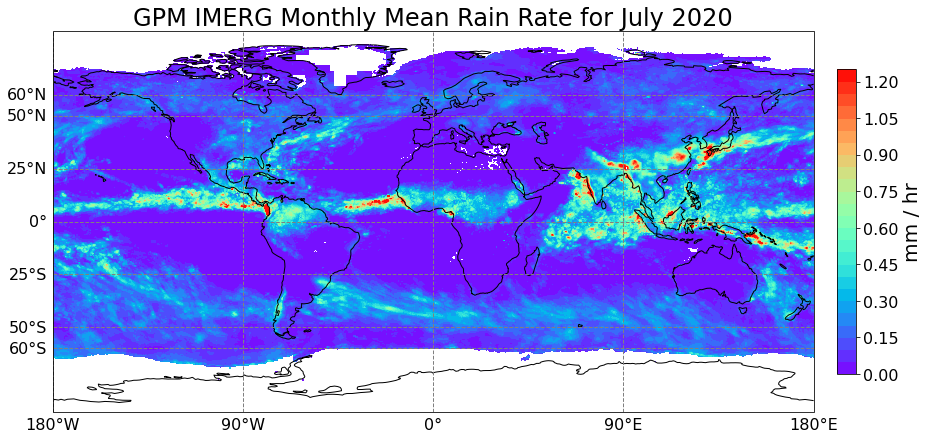

In [74]:
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(21,7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180.0,180.0,-90.0,90.0]) 

# Add coastlines and formatted gridlines
ax.coastlines(resolution="110m",linewidth=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', linestyle='--')

gl.top_labels = False
gl.right_labels = False
gl.xlines = True

gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([-60, -50, -25, 0, 25, 50, 60])

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':16, 'color':'black'}
gl.ylabel_style = {'size':16, 'color':'black'}

# Set contour levels and draw the plot
clevs = np.arange(0,1.26,0.05)
plt.contourf(x, y, precip, clevs, cmap=plt.cm.rainbow)
plt.title('GPM IMERG Monthly Mean Rain Rate for July 2020', size=24)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('mm / hr',size=20)
cb.ax.tick_params(labelsize=16)
plt.show()

In [75]:
fig.savefig('GPM_3IMERGP_WORLD.png', bbox_inches='tight', pad_inches = 0.1)

# Visualizing global mean precipitation for India

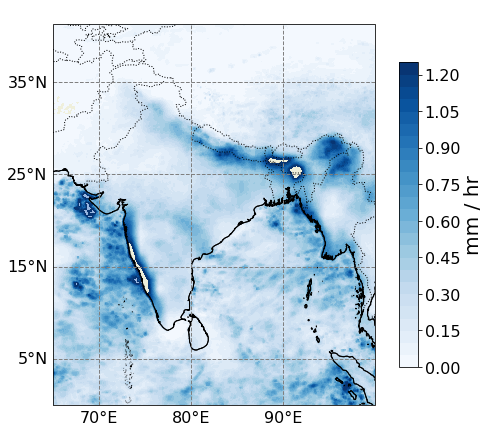

In [76]:
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(21,7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([65.0,100.0,0.0,40.0]) 

# Add coastlines and formatted gridlines
ax.coastlines(resolution="10m",linewidth=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', linestyle='--')

gl.top_labels = False
gl.right_labels = False
gl.xlines = True

gl.xlocator = mticker.FixedLocator([70, 80, 90])
gl.ylocator = mticker.FixedLocator([0, 5, 15,  25, 35, 60])

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':16, 'color':'black'}
gl.ylabel_style = {'size':16, 'color':'black'}

# Set contour levels and draw the plot
clevs = np.arange(0,1.26,0.05)
plt.contourf(x, y, precip, clevs, cmap=plt.cm.Blues)
plt.title('GPM IMERG Monthly Mean Rain Rate for July, 2020', size=16, color='white')
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('mm / hr',size=20)
cb.ax.tick_params(labelsize=16)
plt.show()

In [77]:
fig.savefig('GPM_3IMERGP_INDIA.png', bbox_inches='tight', pad_inches = 0.1)

Thats all